In this project I am performing CS2 matches prediction based on players performance in last 2 months. 

Technologies and frameworks used:   
*Python  
*Selenium  
*Pandas  
*Sqlalchemy  
*PostgreSQL  
*XGBoost  


Data for all of the teams and players is gathered using webscraping from several websites, including passing through CloudFlare captcha. Data is organized and stored in PostgreSQL database to ensure integrity, consistency, efficient retrieval and scalability.

Model after optimalization achieved high precision of 0.685 in test data, and it doesnt show overfitting

In [10]:
from pre_process_data import make_training_data
data = make_training_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team1_id      623 non-null    int64  
 1   Team2_id      623 non-null    int64  
 2   result        623 non-null    bool   
 3   Rating        623 non-null    float64
 4   Kda           623 non-null    float64
 5   openRating    623 non-null    float64
 6   pistolRating  623 non-null    float64
 7   last10m       623 non-null    float64
dtypes: bool(1), float64(5), int64(2)
memory usage: 34.8 KB


Data consist features of mean of team players statistics divided from the mean values from opposite team. 

In [11]:
data.head()

,Team1_id,Team2_id,result,Rating,Kda,openRating,pistolRating,last10m
0,28,39,True,0.024,0.032,-0.016,-0.072,1.0
1,143,66,True,0.084,0.112,0.018,0.024,42.0
2,20,54,False,-0.032,-0.048,-0.044,-0.052,12.0
3,5,67,True,0.082,0.084,0.038,0.040,0.0
4,34,97,False,0.072,0.096,0.014,0.166,2.0


Variable rating is value of players calculated by hltv of overall Player performance.
Kda is Kill/death/assist ratio from player matches.
openRating is the rating of player getting opening(first) kills in round
pistolRating is the rating of player performing in pistol rounds
last10m is Team performance in last 10 matches

Variable,Kda,openRating and pistolRating are calculated by getting the average of all players from team and then dividing values of Team1 minus Team2

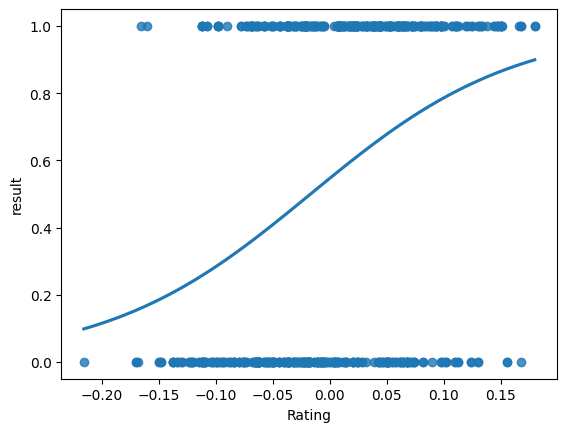

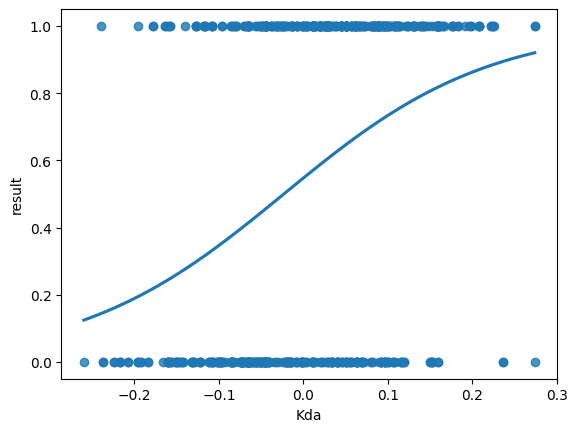

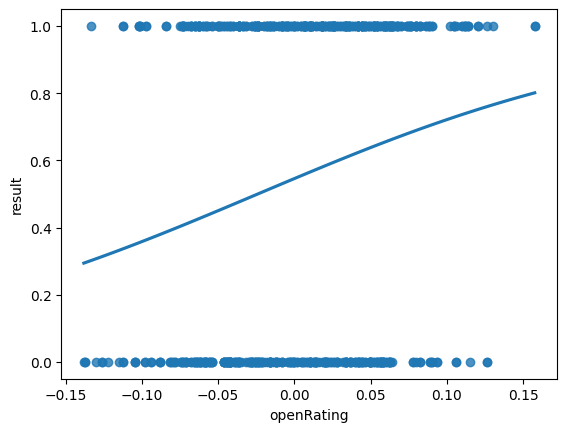

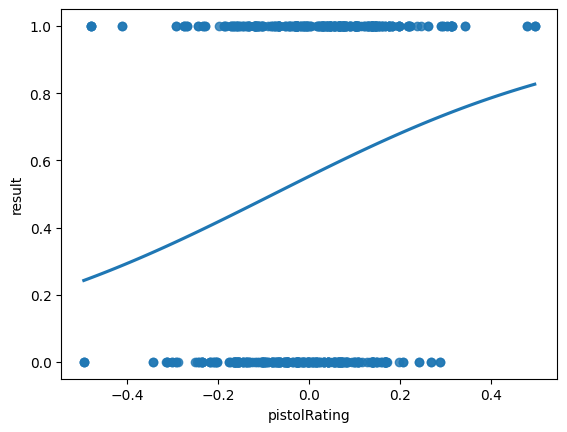

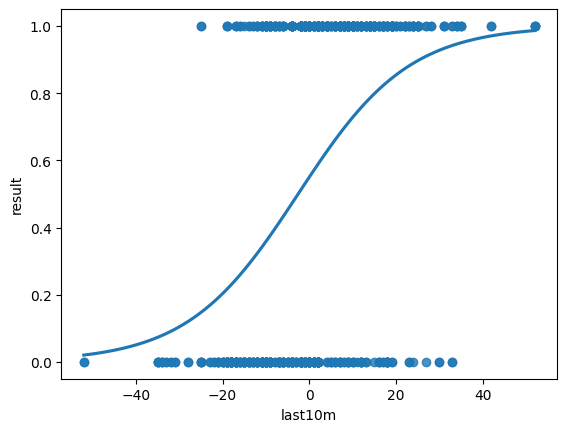

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
y=data['result'].astype(int)
X=data[["Rating","Kda","openRating","pistolRating","last10m"]].astype(float)

for i in X.columns:
    sns.regplot(x=X[i],y=y,logistic=True,ci=None)
    plt.show()

Plots show that teams with higher values tends to perform better and win more matches

In [13]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.load_model("xgb_matches1.json")
model.feature_importances_

array([0.18995626, 0.14972827, 0.07406306, 0.09058215, 0.4956702 ],
      dtype=float32)

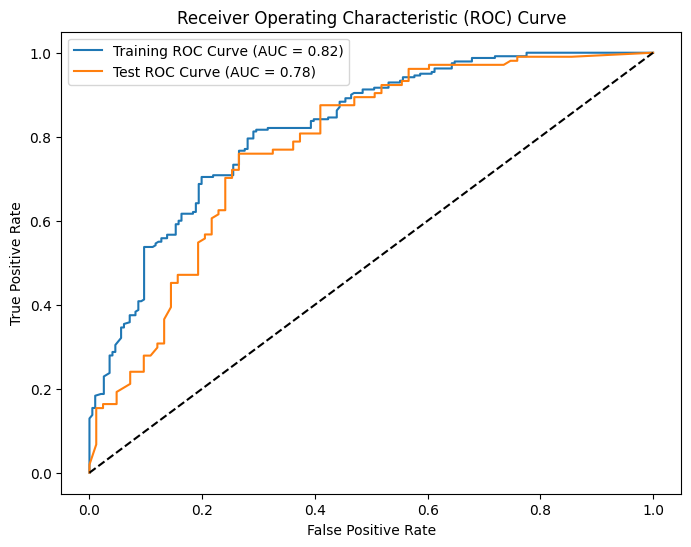

Precision: 0.6857142857142857


In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from predictor2 import get_roc_plot
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=1)

get_roc_plot(model,X_train,X_test,y_train,y_test)


Metrics shows that model predicts winning team with high ratio.
Overfitting of model is not observed.

In evaluating model we focus more on its precision because the false positive can result in losing money while betting.
With this precision optimal betting using Kelly's criterion should result in continious profit